In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydeni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))

In [3]:
df = df.merge(wikid, on="interpret_hlavni", how="outer")

In [4]:
df.columns

Index(['Unnamed: 0', 'hitparada', 'rok', 'tyden', 'pozice', 'track',
       'interpret', 'interpret_hlavni', 'vydavatel', 'id', 'stazeno',
       'nazev_wiki', 'popis_en', 'popis_cs', 'velikost', 'zanry',
       'datum_narozeni', 'datum_umrti', 'zacatek_pusobeni', 'konec_pusobeni',
       'zalozeni', 'zanik', 'gender', 'misto_puvodu', 'zeme_puvodu',
       'obcanstvi', 'etnicita', 'hlas', 'nastroje', 'oceneni', 'nabozenstvi',
       'orientace', 'spotify_id', 'spotify_odberatele'],
      dtype='object')

## Interpreti, kteří se stali jedničkou po své smrti

In [14]:
df[(df['rok']) > (df['datum_umrti'])].groupby('interpret_hlavni')['pozice'].min().nsmallest(10)

interpret_hlavni
Avicii               1.0
Miro Žbirka          1.0
Nico                 7.0
Lil Peep            12.0
David Stypka        21.0
John Lennon         25.0
Karel Gott          25.0
Notorious B.I.G.    44.0
Michael Jackson     60.0
Petr Muk            64.0
Name: pozice, dtype: float64

## Interpreti, kteří se stali jedničkou v roce své smrti

In [12]:
df[(df['rok']) == (df['datum_umrti'])].groupby('interpret_hlavni')['pozice'].min().nsmallest(10)

interpret_hlavni
Avicii              1.0
David Stypka        4.0
Karel Gott         24.0
Michael Jackson    27.0
Miro Žbirka        59.0
Name: pozice, dtype: float64

## Interpreti, kteří se stali jedničkou po (posledním) rozpadu kapely

In [16]:
df[(df['rok'] > df['konec_pusobeni']) & (df['velikost'] != 'člověk')].groupby('interpret_hlavni')['pozice'].min().nsmallest(10)

interpret_hlavni
Take That      6.0
Westlife      45.0
Mandrage      48.0
Surfaces      54.0
Lmfao         61.0
Outkast       75.0
Kollerband    92.0
Name: pozice, dtype: float64

## Podíl neživých a neaktivních lidí na žebříčkové hudbě všech lidí

In [20]:
lide = df[df['velikost'] == 'člověk']

<Axes: xlabel='rok'>

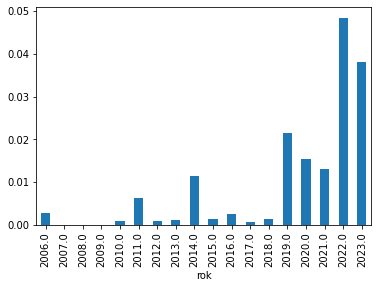

In [22]:
(lide[(lide['datum_umrti'] < lide['rok'])].groupby('rok').size() / lide.groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

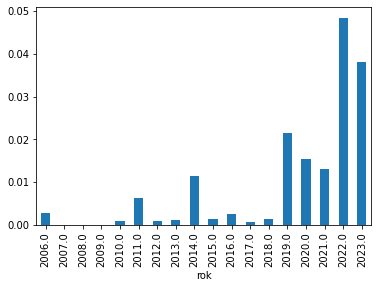

In [21]:
(lide[(lide['konec_pusobeni'] < lide['rok']) | (lide['datum_umrti'] < lide['rok'])].groupby('rok').size() / lide.groupby('rok').size()).plot.bar()

Vypadá to zajímavě, ale asi není, viz ty hodnoty – to je v rámci statistické chyby :(

## Podíl zaniklých kapel na žebříčkové hudbě všech kapel

In [17]:
kapely = df[df['velikost'] != 'člověk']

<Axes: xlabel='rok'>

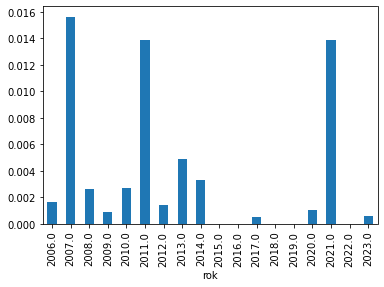

In [19]:
(kapely[kapely['konec_pusobeni'] < kapely['rok']].groupby('rok').size() / kapely.groupby('rok').size()).plot.bar()